## Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd

## Loading the Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/CustomerChurnPrediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dropping the Columns
#### RowNumber,CustomerId,Surname as they have no significance in making predictions


In [5]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


# One Hot Encoding

In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
209,671,45,2,106376.85,1,0,1,158264.62,0,False,False,True
344,718,25,7,0.00,2,1,0,30380.12,0,False,False,False
2898,696,52,6,139781.06,1,1,0,27445.40,1,False,False,True
2863,755,43,9,0.00,2,1,0,18066.69,0,False,False,False
8746,660,34,8,106486.66,2,0,1,182262.66,0,False,False,True


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']


# Model Splitting

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled.shape

(8000, 11)

# Experiment 1

## Model Building

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer

In [113]:
model = Sequential()
# Input Layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))

# Hidden Layer
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))

# OutputLayer
model.add(Dense(1,activation='sigmoid'))

In [114]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

In [115]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Model Training

In [116]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7948 - loss: 0.5067 - val_accuracy: 0.7987 - val_loss: 0.4922
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7933 - loss: 0.4965 - val_accuracy: 0.7987 - val_loss: 0.4747
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7917 - loss: 0.4808 - val_accuracy: 0.7987 - val_loss: 0.4519
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7952 - loss: 0.4570 - val_accuracy: 0.7987 - val_loss: 0.4334
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4430 - val_accuracy: 0.8106 - val_loss: 0.4232
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8042 - loss: 0.4279 - val_accuracy: 0.8256 - val_loss: 0.4190
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8106 - loss: 0.4329 - val_accuracy: 0.8269 - val_loss: 0.4159
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8160 - loss: 0.4235 - val_accuracy: 0.

In [117]:
history.history

{'accuracy': [0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7964062690734863,
  0.8084375262260437,
  0.8131250143051147,
  0.8148437738418579,
  0.8145312666893005,
  0.8168749809265137],
 'loss': [0.5057668089866638,
  0.4922237694263458,
  0.4727838635444641,
  0.45218124985694885,
  0.43890270590782166,
  0.431904673576355,
  0.4285416305065155,
  0.42612969875335693,
  0.42356133460998535,
  0.4212048649787903],
 'val_accuracy': [0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.8106250166893005,
  0.8256250023841858,
  0.8268749713897705,
  0.828125,
  0.8237500190734863,
  0.824999988079071],
 'val_loss': [0.49220049381256104,
  0.4746593236923218,
  0.45192375779151917,
  0.43336695432662964,
  0.42322230339050293,
  0.4190290868282318,
  0.41594135761260986,
  0.41363292932510376,
  0.41151756048202515,
  0.4092063009738922]}

In [119]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4086


In [120]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [121]:
y_pred

array([[0.14987373],
       [0.0758975 ],
       [0.32157674],
       ...,
       [0.40912324],
       [0.06388343],
       [0.16936903]], dtype=float32)

In [122]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_labels)

0.819

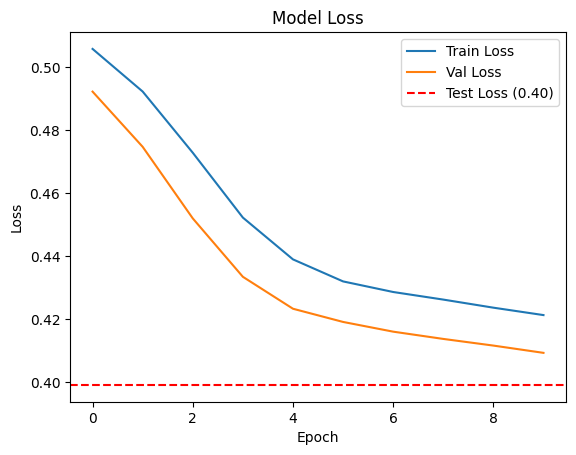

In [128]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

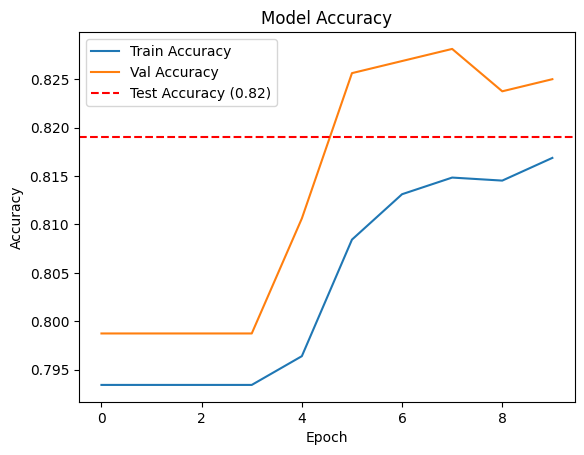

In [127]:
plt.plot(history.history['accuracy'],label = f'Train Accuracy ({history.history['accuracy']:.2f})')
plt.plot(history.history['val_accuracy'],label = f'Val Accuracy ({history.history['val_accuracy']:.2f})')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

## As we can see from the above graphs that there is overfitting scenario

# Experiment - 2
## Model Training  - Increasing the Epochs to 50

In [143]:
model = Sequential()
# Input Layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))
# Hidden Layer
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [144]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [145]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5271 - loss: 0.6721 - val_accuracy: 0.7987 - val_loss: 0.5022
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7867 - loss: 0.5102 - val_accuracy: 0.7987 - val_loss: 0.4832
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.4760 - val_accuracy: 0.7987 - val_loss: 0.4674
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7866 - loss: 0.4814 - val_accuracy: 0.7987 - val_loss: 0.4485
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7977 - loss: 0.4514 - val_accuracy: 0.7987 - val_loss: 0.4331
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7903 - loss: 0.4444 - val_accuracy: 0.8075 - val_loss: 0.4249
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8030 - loss: 0.4271 - val_accuracy: 0.8194 - val_loss: 0.4212
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8083 - loss: 0.4317 - val_accuracy: 0

In [146]:
history.history

{'accuracy': [0.6956250071525574,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7948437333106995,
  0.8037499785423279,
  0.8051562309265137,
  0.8082812428474426,
  0.8098437786102295,
  0.8129687309265137,
  0.8142187595367432,
  0.815625011920929,
  0.8198437690734863,
  0.819531261920929,
  0.823437511920929,
  0.8231250047683716,
  0.82421875,
  0.8256250023841858,
  0.8284375071525574,
  0.8271874785423279,
  0.8276562690734863,
  0.8314062356948853,
  0.8296874761581421,
  0.8309375047683716,
  0.8309375047683716,
  0.8326562643051147,
  0.83203125,
  0.8331249952316284,
  0.8345312476158142,
  0.835156261920929,
  0.8360937237739563,
  0.8356249928474426,
  0.8373437523841858,
  0.8368750214576721,
  0.8387500047683716,
  0.8387500047683716,
  0.8399999737739563,
  0.8401562571525574,
  0.8420312404632568,
  0.8407812714576721,
  0.8442187309265137,
  0.8439062237739563,
  0.8428124785423279,
  0.8446875214576721,
  0.84593749046325

In [153]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.3692


In [154]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [155]:
y_pred

array([[0.08594347],
       [0.08194024],
       [0.37928763],
       ...,
       [0.63455176],
       [0.0717786 ],
       [0.22423291]], dtype=float32)

In [156]:
y_pred_labels = (y_pred > 0.5).astype(int)
y_pred_labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_labels)

0.85

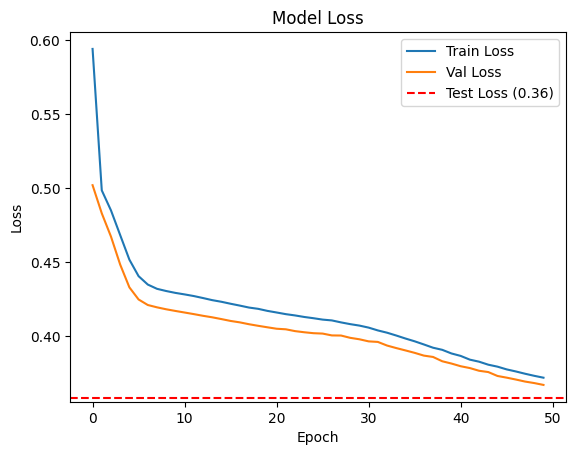

In [158]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

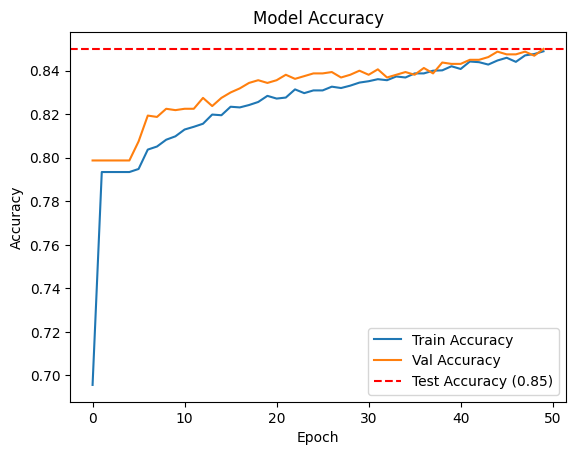

In [159]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### Comparing Experiment 1 and 2

  ### Exp -1 : Accuracy - 82
  ### Exp -2 : Accuracy - 85

# Experiment - 3
## Model Training  - Hidden Layers Activation Function Relu and epochs=50

In [161]:
model = Sequential()
# Input Layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))
# Hidden Layer
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [162]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8005 - loss: 0.5467 - val_accuracy: 0.7994 - val_loss: 0.4777
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7907 - loss: 0.4756 - val_accuracy: 0.8119 - val_loss: 0.4434
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8041 - loss: 0.4489 - val_accuracy: 0.8200 - val_loss: 0.4277
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8196 - loss: 0.4269 - val_accuracy: 0.8281 - val_loss: 0.4181
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8261 - loss: 0.4150 - val_accuracy: 0.8363 - val_loss: 0.4086
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8323 - loss: 0.4002 - val_accuracy: 0.8431 - val_loss: 0.3983
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8485 - loss: 0.3767 - val_accuracy: 0.8431 - val_loss: 0.3856
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8412 - loss: 0.3863 - val_accuracy: 0

In [165]:
history.history

{'accuracy': [0.79296875,
  0.8021875023841858,
  0.8107812404632568,
  0.8207812309265137,
  0.8285937309265137,
  0.8357812762260437,
  0.8403124809265137,
  0.8481249809265137,
  0.8510937690734863,
  0.8535937666893005,
  0.8579687476158142,
  0.8573437333106995,
  0.8575000166893005,
  0.8596875071525574,
  0.8600000143051147,
  0.859375,
  0.8626562356948853,
  0.8626562356948853,
  0.8620312213897705,
  0.8610937595367432,
  0.8634374737739563,
  0.8626562356948853,
  0.8628125190734863,
  0.8639062643051147,
  0.8617187738418579,
  0.8642187714576721,
  0.8628125190734863,
  0.8628125190734863,
  0.86328125,
  0.8635937571525574,
  0.8637499809265137,
  0.8654687404632568,
  0.8648437261581421,
  0.86328125,
  0.8646875023841858,
  0.8656250238418579,
  0.8662499785423279,
  0.8660937547683716,
  0.8646875023841858,
  0.8645312786102295,
  0.8671875,
  0.8642187714576721,
  0.8662499785423279,
  0.8642187714576721,
  0.8654687404632568,
  0.8651562333106995,
  0.866249978542327

In [168]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8635 - loss: 0.3413


In [169]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [170]:
y_pred

array([[0.05016654],
       [0.01670211],
       [0.13475345],
       ...,
       [0.73791534],
       [0.1390909 ],
       [0.42895633]], dtype=float32)

In [171]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_labels)

0.861

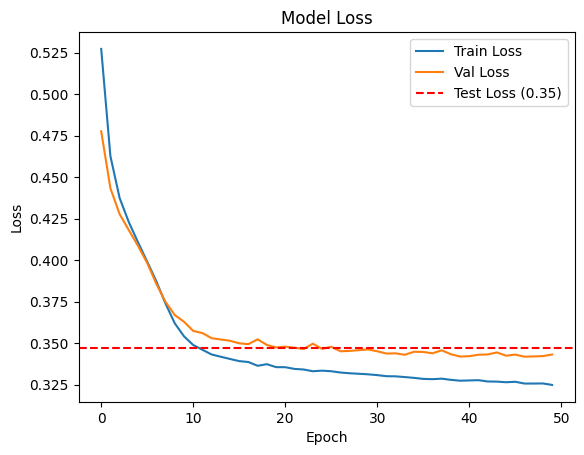

In [174]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

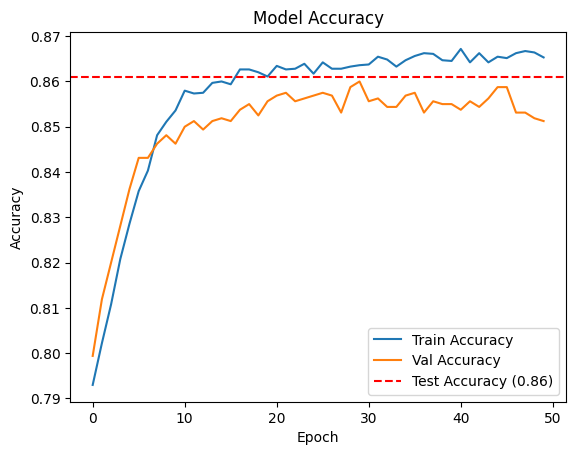

In [175]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### From the above Graphs we can say that the model is overfitting

### Comparing Experiments 1 ,2 and 3

    ### Experiment 1 : Model Accuracy - 82
    ### Experiment 2 : Model Accuracy - 85
    ### Experiment 3 : Model Accuracy - 86


# Experiment - 4
## Model Training  - Increasing Perceptrons in First Hidden Layer

In [177]:
model = Sequential()
# Input Layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))
# Hidden Layer
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='relu'))
# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [178]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [179]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6957 - loss: 0.5828 - val_accuracy: 0.8244 - val_loss: 0.4237
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8259 - loss: 0.4184 - val_accuracy: 0.8394 - val_loss: 0.4005
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8404 - loss: 0.3960 - val_accuracy: 0.8469 - val_loss: 0.3803
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8458 - loss: 0.3767 - val_accuracy: 0.8500 - val_loss: 0.3648
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8465 - loss: 0.3658 - val_accuracy: 0.8569 - val_loss: 0.3546
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8594 - loss: 0.3567 - val_accuracy: 0.8569 - val_loss: 0.3503
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8575 - loss: 0.3419 - val_accuracy: 0.8550 - val_loss: 0.3478
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8610 - loss: 0.3413 - val_accuracy: 0

In [180]:
history.history

{'accuracy': [0.7717187404632568,
  0.8235937356948853,
  0.8374999761581421,
  0.8478124737739563,
  0.8540624976158142,
  0.8600000143051147,
  0.860156238079071,
  0.8609374761581421,
  0.8596875071525574,
  0.8621875047683716,
  0.8614062666893005,
  0.8631250262260437,
  0.8648437261581421,
  0.8623437285423279,
  0.8651562333106995,
  0.8657812476158142,
  0.864062488079071,
  0.8665624856948853,
  0.8651562333106995,
  0.86328125,
  0.866406261920929,
  0.8659374713897705,
  0.8675000071525574,
  0.8656250238418579,
  0.8675000071525574,
  0.8687499761581421,
  0.8685937523841858,
  0.8659374713897705,
  0.8675000071525574,
  0.8675000071525574,
  0.8692187666893005,
  0.8676562309265137,
  0.870312511920929,
  0.8687499761581421,
  0.8698437213897705,
  0.8709375262260437,
  0.8701562285423279,
  0.8709375262260437,
  0.8692187666893005,
  0.8693749904632568,
  0.8685937523841858,
  0.8715624809265137,
  0.8706250190734863,
  0.8715624809265137,
  0.8690624833106995,
  0.871093

In [182]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3415


In [183]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [184]:
y_pred

array([[0.03481282],
       [0.03121905],
       [0.13028775],
       ...,
       [0.68761396],
       [0.10112508],
       [0.28448126]], dtype=float32)

In [185]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_labels)

0.8595

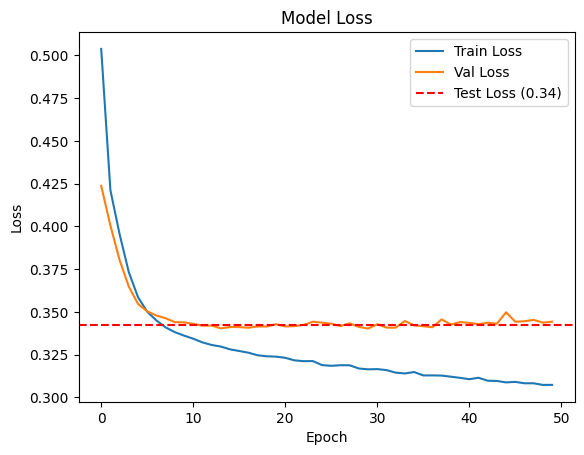

In [187]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

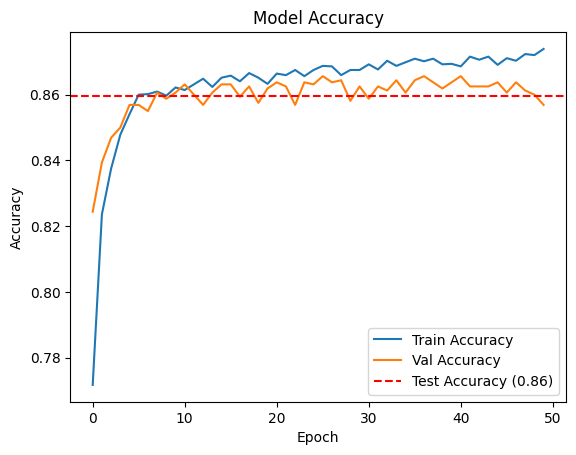

In [188]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### From the above Graphs we can say that the model is overfitting

### Comparing Experiments 1 ,2 and 3 ,4

    ### Experiment 1 : Model Accuracy - 82
    ### Experiment 2 : Model Accuracy - 85
    ### Experiment 3 : Model Accuracy - 86
    ### Experiment 4 : Model Accuracy - 85.9